In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Read in and preview the dataset
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [4]:
# Extract the first two digits from "TIME OCC", representing the hour,
# and convert to integer data type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

In [5]:
# Preview the DataFrame to confirm the new column is correct
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


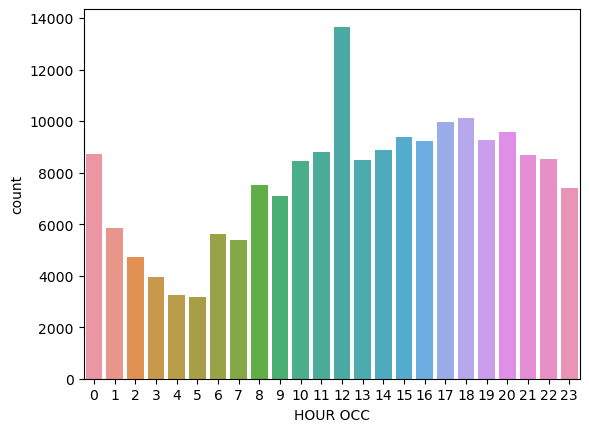

In [6]:
# Produce a countplot to find the largest frequency of crimes by hour
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

In [7]:
# Midday has the largest volume of crime
peak_crime_hour = 12

In [8]:
## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
## Save as a string variable called peak_night_crime_location
# Filter for the night-time hours
# 0 = midnight; 3 = crimes between 3am and 3:59am, i.e., don't include 4
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

In [9]:
# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
peak_night_crime_location = night_time.groupby("AREA NAME", 
                                               as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",
                                                                                               ascending=False).iloc[0]["AREA NAME"]
# Print the peak night crime location
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

The area with the largest volume of night crime is Central


In [10]:
## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
## Save as a pandas Series called victim_ages
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

In [24]:
# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)


In [25]:
# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64
